# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

In [ ]:
chat_id = 407415686

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats 

------------------

##  <ins>Задание 1.</ins>

**Контекст**
Мы считаем, что наш продукт достаточно дорогой для клиента.
У нас есть гипотеза, что уменьшение цены продукта
позволит повысить частоту продаж
и суммарно увеличит доходность продукта.
        
**Тест**
Мы проводим тест,
в рамках которого контролем является
продажа продукта со старой ценой,
а тестом - продажа продукта с новой ценой.
Целью этого теста
является проверка гипотезы роста доходности
нашего продукта из-за уменьшения тарифа.

**Статистические вводные**
Уровень значимости 5%.
Мы хотели бы различать 5%-ное
изменение целевой метрики
с вероятностью 80%.

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

Основной метрикой будет **NPV**, потому что этот показатель учитывает, как доход от клиента, так и расход от его привелечения 

In [ ]:
data = pd.read_csv('hist_telesales.csv')

### 2. Альтернатива в критерии.

**H0:** NPV на тесте = NPV на контроле<br/>  
**H1:** NPV на тесте больше, чем NPV на контроле 

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Размер выборки посчитаем по формуле:
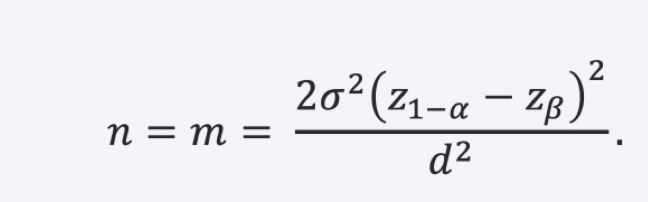

Выбираем правосторонюю альтернативу <br/>
**Alpha** = 0.05 <br/>
**Beta** = 0.2 (1 - 0.8) <br/>
**MDE** = желаемое изменение метрики * значение метрики на контроле = 0.05 * data['PV'].mean() <br/>
**Дисперсия NPV** = np.var(data['NPV'])


In [ ]:
n = (2 * np.var(data['NPV'])*(scipy.stats.norm.ppf(0.95) - scipy.stats.norm.ppf(0.2))**2) / (0.05 * data['NPV'].mean())**2
print(f'Размер выборки: {round(n)}')

Размер выборки: 28671


### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

**Код выборки** = 28217

In [ ]:
control_data = pd.read_csv('Контроль.csv')
test_data = pd.read_csv('Тест.csv')

Так как мы хотим проверить дейстивтельно ли выборочное среднее на тесте больше, чем на конроле, то будем использовать тест Стьюдента 

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
scipy.stats.ttest_ind(control_data['NPV'], test_data['NPV'], alternative='less')

Ttest_indResult(statistic=-3.3307697797619342, pvalue=0.0004333042302261947)

### 4. Принятие решения. Расписать подробно с аргументами.

In [ ]:
cdm = control_data['NPV'].mean() 
tdm = test_data['NPV'].mean()
temp_prirosta = round((tdm * 100) / cdm - 100, 3)
print(f'NPV\nВыборочное среднее на контроле: {cdm} \nВыборочное среднее тесте: {tdm} \nТемп прироста: {temp_prirosta}%')

NPV
Выборочное среднее на контроле: 281.1131108088312 
Выборочное среднее тесте: 299.6372641344913 
Темп прироста: 6.59%


P-value = 0.0004 и меньше alpha = 0.05, поэтому мы можем отвергнуть гипотезу H0 и сказать, что различие между выборочным средним **NPV** на тесте и контроле **статистически значимое** 

**Вывод:** уменьшение цены продукта действительно позволит повысить NPV и повысит частоту продаж (так как цена уменьшилась, а NPV выросло). Стоит предлагать новую цену всем пользователям.

---------------------


##  <ins>Задание 2.</ins>

**Контекст**
Мы провели Cust Dev и поняли,
что форма авторизации для клиента сложна,
и из-за этого часть клиентов
отваливается в заявочном процессе.
Мы решили разработать
новый процесс авторизации,
и у нас есть гипотеза,
что он позволит повысить
утилизации наших счетов.
        
**Тест**
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где у одной части (контроля) 
старый процесс авторизации,
а у второй части (теста) - новый.
Целью этого теста
является повышение утилизаций счёта.

**Статистические вводные**
Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%.

Уровень значимости 5%.
Мы хотели бы различать 3%-ное
изменение целевой метрики
с вероятностью 95%.

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

In [ ]:
data = pd.read_csv('hist_credit_card.csv')

Нашей метрикой будет флаг утилизации счетов, потому что цель теста проверить действительно ли новая авторизация повышает конверсию в утилизацию счета. 

### 2. Альтернатива в критерии.

**H0:** Конверсия на тесте = Конверсии на контроле<br/>  
**H1:** Конверсия на тесте > Конверсия на контроле

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

In [ ]:
data.corr()

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
ID,1.000000,-0.002624,0.004518,0.001279,-0.000964,-0.000077,-0.003181,-0.005220,-0.003480
Возраст,-0.002624,1.000000,0.001514,-0.004102,0.007277,0.002460,0.003447,0.006117,0.003747
Доход клиента,0.004518,0.001514,1.000000,-0.000882,0.000706,0.001032,-0.002142,-0.001937,-0.002269
Вероятность банкротства,0.001279,-0.004102,-0.000882,1.000000,-0.215398,-0.099635,-0.043319,-0.139128,-0.049433
Флаг утилизации счёта,-0.000964,0.007277,0.000706,-0.215398,1.000000,0.452036,0.204981,0.646524,0.233611
Расходы,-0.000077,0.002460,0.001032,-0.099635,0.452036,1.000000,0.090826,0.294538,0.086146
PV КК,-0.003181,0.003447,-0.002142,-0.043319,0.204981,0.090826,1.000000,0.128742,0.998232
PV услуги,-0.005220,0.006117,-0.001937,-0.139128,0.646524,0.294538,0.128742,1.000000,0.183529
NPV,-0.003480,0.003747,-0.002269,-0.049433,0.233611,0.086146,0.998232,0.183529,1.000000


На **утилизацию счета** больше всего влияет **вероятность банкротства**, так как у них самая большая по модулю корреляция = 0.215. Стоит отметить, что корреляция всё же слабая. <br/>
Не берем в учет параметры, которые могут возникнуть только если **флаг утилизации счета** = 1

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Размер выборки посчитаем по формуле: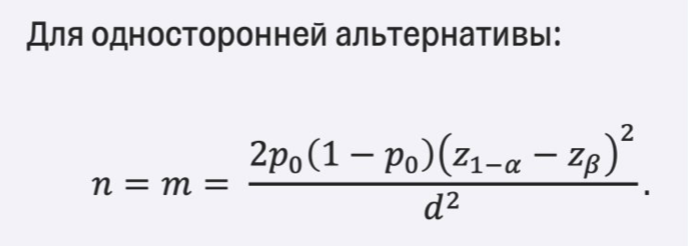

Правосторонняя альтернатива <br/>
**d** = MDE = 3% <br/>
**beta** = 0.05 <br/>
**alpha** = 0.05 <br/>
**p** = len(data['Флаг утилизации счёта']==1)/len(data) <br/>
**q** = 1 - p 

In [ ]:
p = data['Флаг утилизации счёта'].mean()
q = 1 - p
print(f'p = {p} \n q = {q}')

p = 0.7415439535921463 
 q = 0.2584560464078537


In [ ]:
n = (2 * p * q) * ((scipy.stats.norm.ppf(0.95) - scipy.stats.norm.ppf(0.05))**2) / (0.03 * p)**2
print(f'Размер выборки: {round(n)}')

Размер выборки: 8382


### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

**Код выборки** = 11577

In [ ]:
control_data = pd.read_csv('Контроль.csv')
test_data = pd.read_csv('Тест.csv')

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

#### Проверка однородности 

In [ ]:
from scipy.stats import ks_2samp 
from hyppo.ksample import MMD

In [ ]:
scipy.stats.ks_2samp(control_data['Вероятность банкротства'], test_data['Вероятность банкротства'], alternative='two-sided')

KstestResult(statistic=0.011691720353137676, pvalue=0.615597087103461, statistic_location=0.0644057406317369, statistic_sign=1)

Выборки **однородны**, так как p-value > 0.02 (**H0:** F(x) = G(x)).

In [ ]:
cdm = control_data['Флаг утилизации счёта'].mean()
tdm = test_data['Флаг утилизации счёта'].mean()
temp_prirosta = round((tdm * 100) / cdm - 100, 3)
print(f'Флаг утилизации счёта\nВыборочное среднее на контроле: {cdm} \nВыборочное среднее тесте: {tdm} \nТемп прироста: {temp_prirosta}%')

**Флаг утилизации счёта**
Выборочное среднее на контроле: 0.7364590789787641 
Выборочное среднее тесте: 0.7606776425674063 
Темп прироста: 3.289%


In [ ]:
scipy.stats.ttest_ind(control_data['Флаг утилизации счёта'], test_data['Флаг утилизации счёта'], alternative='less')

Ttest_indResult(statistic=-3.6151377424010427, pvalue=0.00015053392270463351)

P-value = 0.0001 и меньше alpha = 0.05, поэтому мы можем отвергнуть гипотезу H0 и сказать, что различие между выборочным средним **'Флаг утилизации счёта'** на тесте и контроле статистически значимое 

**Вывод:** новый процесс авторизации действительно повысил утилизацию счетов, поэтому стоит ввести новый процесс авторизации для всех пользовталей.